<a href="https://colab.research.google.com/github/puffyq/python-dl/blob/main/chap3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 用tf编写线性分类器
import numpy as np


In [ ]:
num_samples_per_class = 1000
negativa_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [ ]:
inputs = np.vstack((negativa_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1),dtype="float32")))

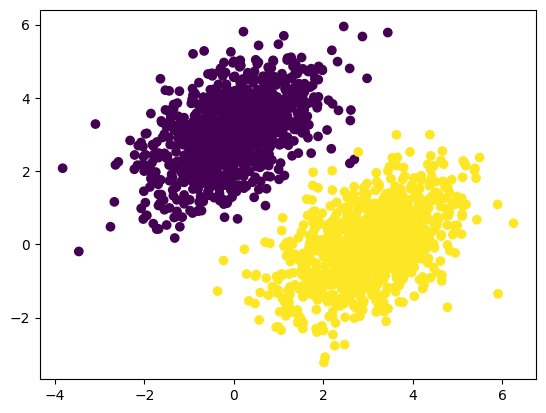

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [ ]:
# create linear classification
import tensorflow as tf
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [ ]:
def model(inputs):
  return tf.matmul(inputs, w) + b

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets- predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
# training process
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w,b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [ ]:
# batch training
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step {step}: {loss: .4f}")

loss at step 0:  5.5602
loss at step 1:  0.5160
loss at step 2:  0.1764
loss at step 3:  0.1235
loss at step 4:  0.1099
loss at step 5:  0.1020
loss at step 6:  0.0954
loss at step 7:  0.0895
loss at step 8:  0.0840
loss at step 9:  0.0790
loss at step 10:  0.0744
loss at step 11:  0.0702
loss at step 12:  0.0664
loss at step 13:  0.0628
loss at step 14:  0.0596
loss at step 15:  0.0566
loss at step 16:  0.0539
loss at step 17:  0.0514
loss at step 18:  0.0491
loss at step 19:  0.0470
loss at step 20:  0.0450
loss at step 21:  0.0433
loss at step 22:  0.0416
loss at step 23:  0.0401
loss at step 24:  0.0388
loss at step 25:  0.0375
loss at step 26:  0.0364
loss at step 27:  0.0353
loss at step 28:  0.0343
loss at step 29:  0.0334
loss at step 30:  0.0326
loss at step 31:  0.0319
loss at step 32:  0.0312
loss at step 33:  0.0306
loss at step 34:  0.0300
loss at step 35:  0.0294
loss at step 36:  0.0290
loss at step 37:  0.0285
loss at step 38:  0.0281
loss at step 39:  0.0277


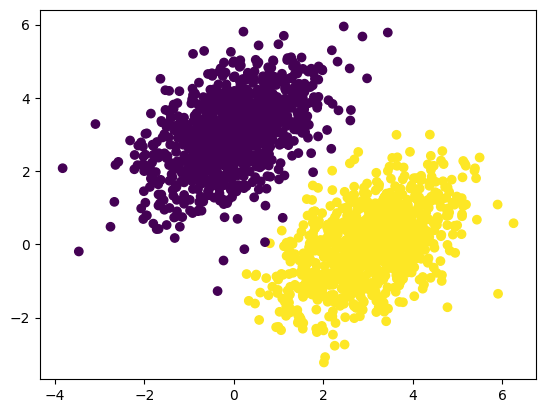

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

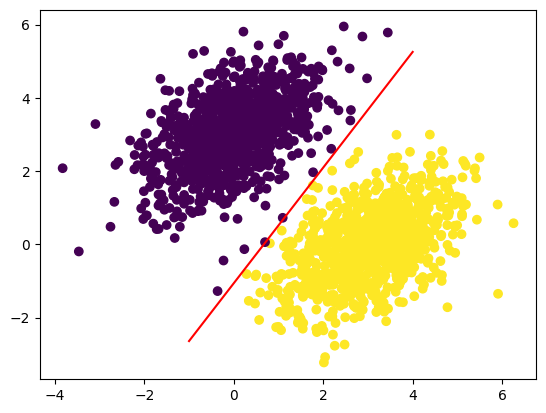

In [ ]:
# visualize linear classification
x = np.linspace(-1, 4, 100)
y = - w[0]/ w[1]*x + (0.5-b)/w[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] >0.5)

In [6]:
from tensorflow import keras

class simple_dense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.w = self.add_weight(shape=(input_dim, self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.w) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [7]:
import tensorflow as tf
my_dense = simple_dense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")


# two class: imdb datasets


In [8]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]

In [11]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decodef_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train  = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6936 - loss: 0.5942 - val_accuracy: 0.8717 - val_loss: 0.3801
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8942 - loss: 0.3243 - val_accuracy: 0.8806 - val_loss: 0.3117
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9169 - loss: 0.2460 - val_accuracy: 0.8849 - val_loss: 0.2907
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9370 - loss: 0.1942 - val_accuracy: 0.8870 - val_loss: 0.2778
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9506 - loss: 0.1594 - val_accuracy: 0.8844 - val_loss: 0.2858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9601 - loss: 0.1350 - val_accuracy: 0.8797 - val_loss: 0.2977
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9692 - loss: 0.1105 - val_accuracy: 0.8849 - val_loss: 0.2991
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9750 - loss: 0.0914 - val_accuracy: 0.8833 - v

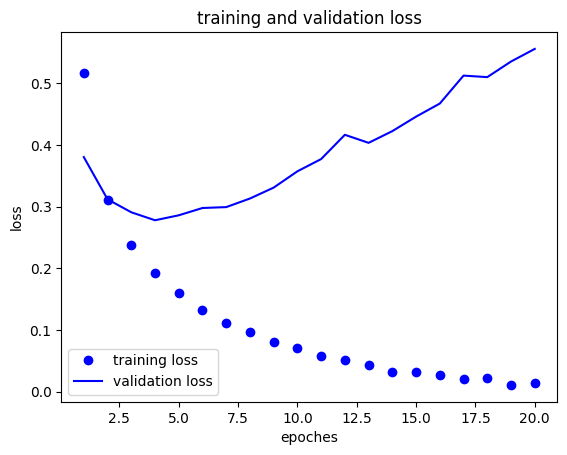

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="training loss")
plt.plot(epochs, val_loss_values, "b", label= "validation loss")
plt.title("training and validation loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.show()

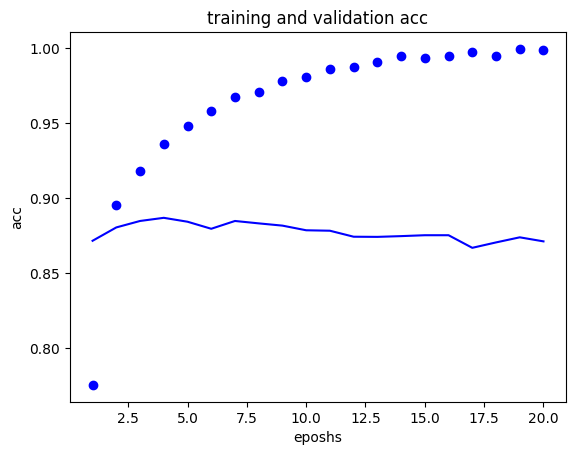

In [31]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="traing acc")
plt.plot(epochs, val_acc, "b", label="val acc")
plt.title("training and validation acc")
plt.xlabel("eposhs")
plt.ylabel("acc")
plt.show()

# multi class:  news

In [32]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decodef_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
train_labels[10]

3

In [34]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [36]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels)


In [57]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [58]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [59]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3537 - loss: 3.2664 - val_accuracy: 0.5690 - val_loss: 1.9334
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6337 - loss: 1.7154 - val_accuracy: 0.6680 - val_loss: 1.4269
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7168 - loss: 1.2693 - val_accuracy: 0.7200 - val_loss: 1.2133
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7727 - loss: 1.0500 - val_accuracy: 0.7680 - val_loss: 1.1001
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8203 - loss: 0.8573 - val_accuracy: 0.7810 - val_loss: 1.0114
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8470 - loss: 0.7218 - val_accuracy: 0.7930 - val_loss: 0.9568
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8728 - loss: 0.6078 - val_accuracy: 0.7990 - val_loss: 0.9248
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8886 - loss: 0.5179 - val_accuracy: 0.8210 - val_loss:

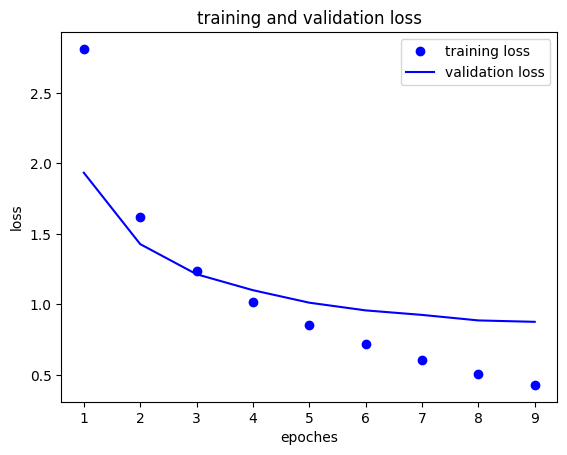

In [60]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="training loss")
plt.plot(epochs, val_loss_values, "b", label= "validation loss")
plt.title("training and validation loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.show()

In [61]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7975 - loss: 0.9269


In [62]:
results # 1) loss; 2) acc

[0.9575389623641968, 0.7871772050857544]

# continuous: boston house prize


In [7]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
test_data -= mean
test_data /=std

In [11]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [14]:
# k-fold
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"processing fold {i}")
  val_data = train_data[i*num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
      axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16,verbose=0)

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [15]:
all_scores


[2.0095009803771973, 2.3304102420806885, 2.368807315826416, 2.38741397857666]